In [5]:
from google.colab import drive
import numpy as np
import pandas as pd

In [6]:
import io
df = pd.read_csv("wine.csv")

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
feature = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [11]:
X = df[feature]
y = df.quality

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5895833333333333


In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [16]:
import seaborn as sn
import matplotlib.pyplot as plt

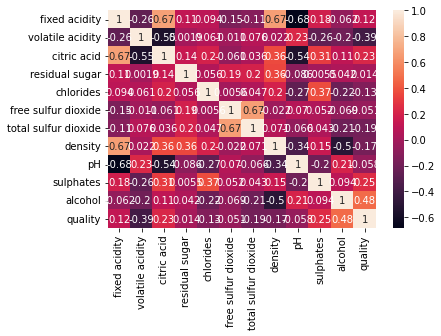

In [17]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

In [18]:
from sklearn import tree

In [19]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_10 <= 10.25
|   |--- feature_9 <= 0.57
|   |   |--- feature_10 <= 10.15
|   |   |   |--- feature_6 <= 10.50
|   |   |   |   |--- feature_3 <= 1.65
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_3 >  1.65
|   |   |   |   |   |--- class: 4
|   |   |   |--- feature_6 >  10.50
|   |   |   |   |--- feature_10 <= 9.08
|   |   |   |   |   |--- feature_9 <= 0.54
|   |   |   |   |   |   |--- feature_4 <= 0.08
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_4 >  0.08
|   |   |   |   |   |   |   |--- feature_6 <= 79.00
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_6 >  79.00
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_9 >  0.54
|   |   |   |   |   |   |--- feature_2 <= 0.59
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- feature_2 >  0.59
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_10 >  9.08
|   |   |   |   |   |

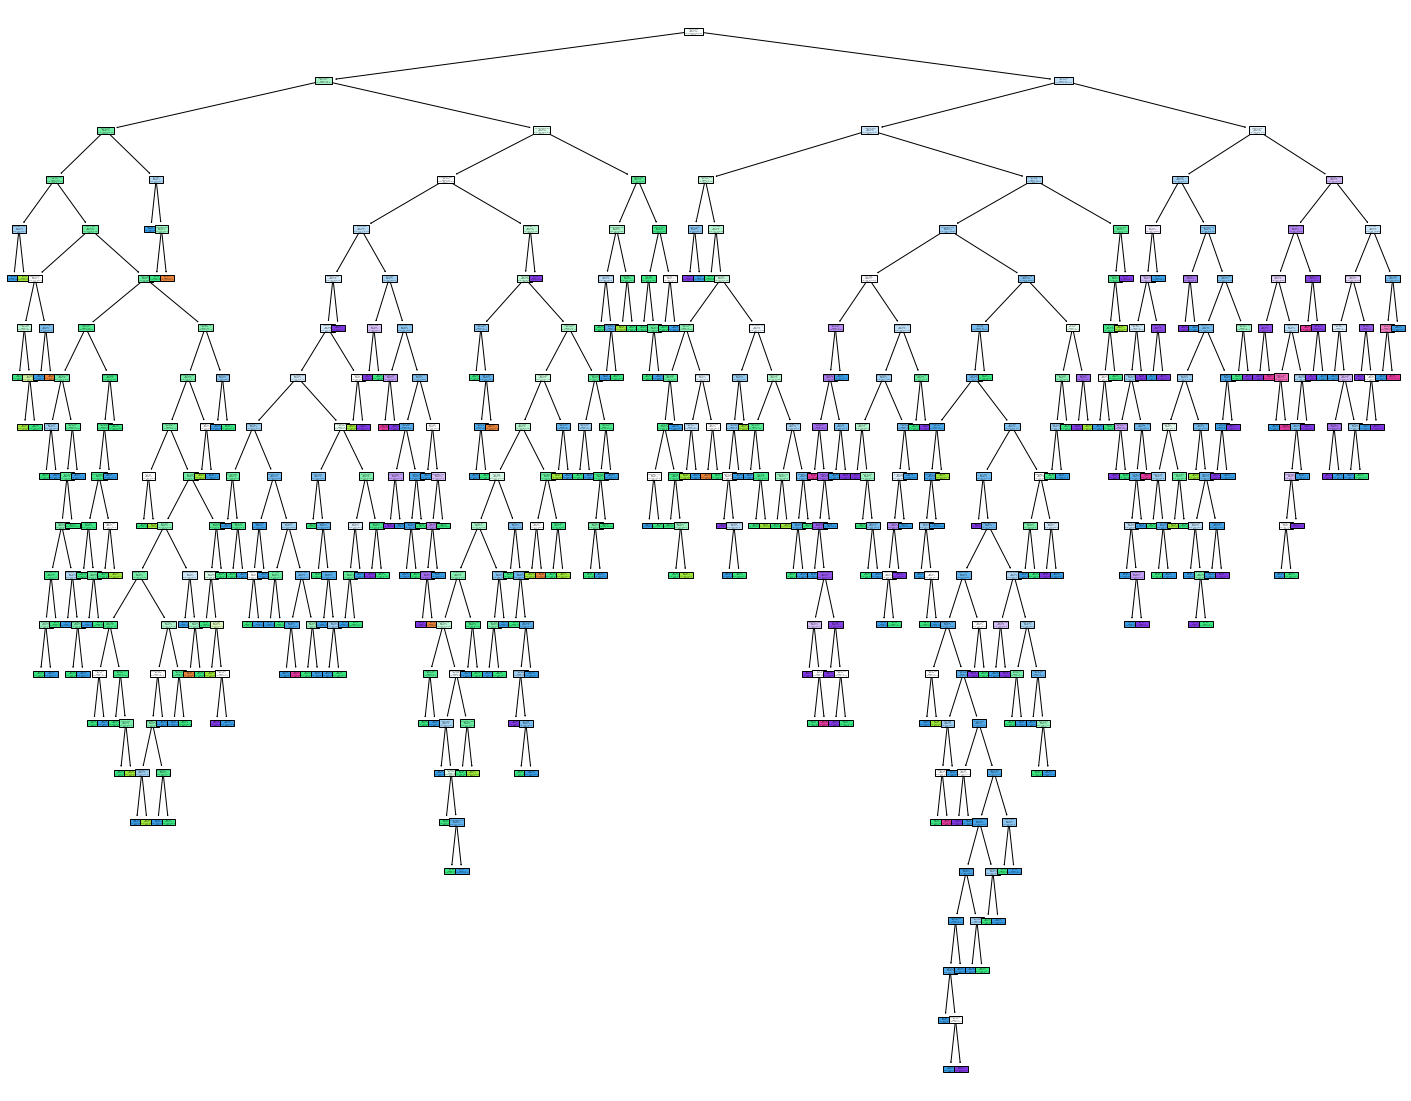

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature,  
                   class_names="quality",
                   filled=True)

#Change quality to binary

In [21]:
wine = pd.read_csv('wine.csv')

In [22]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [23]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()

In [24]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [25]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [27]:
X = wine[feature]
y = wine.quality

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=40)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8729166666666667


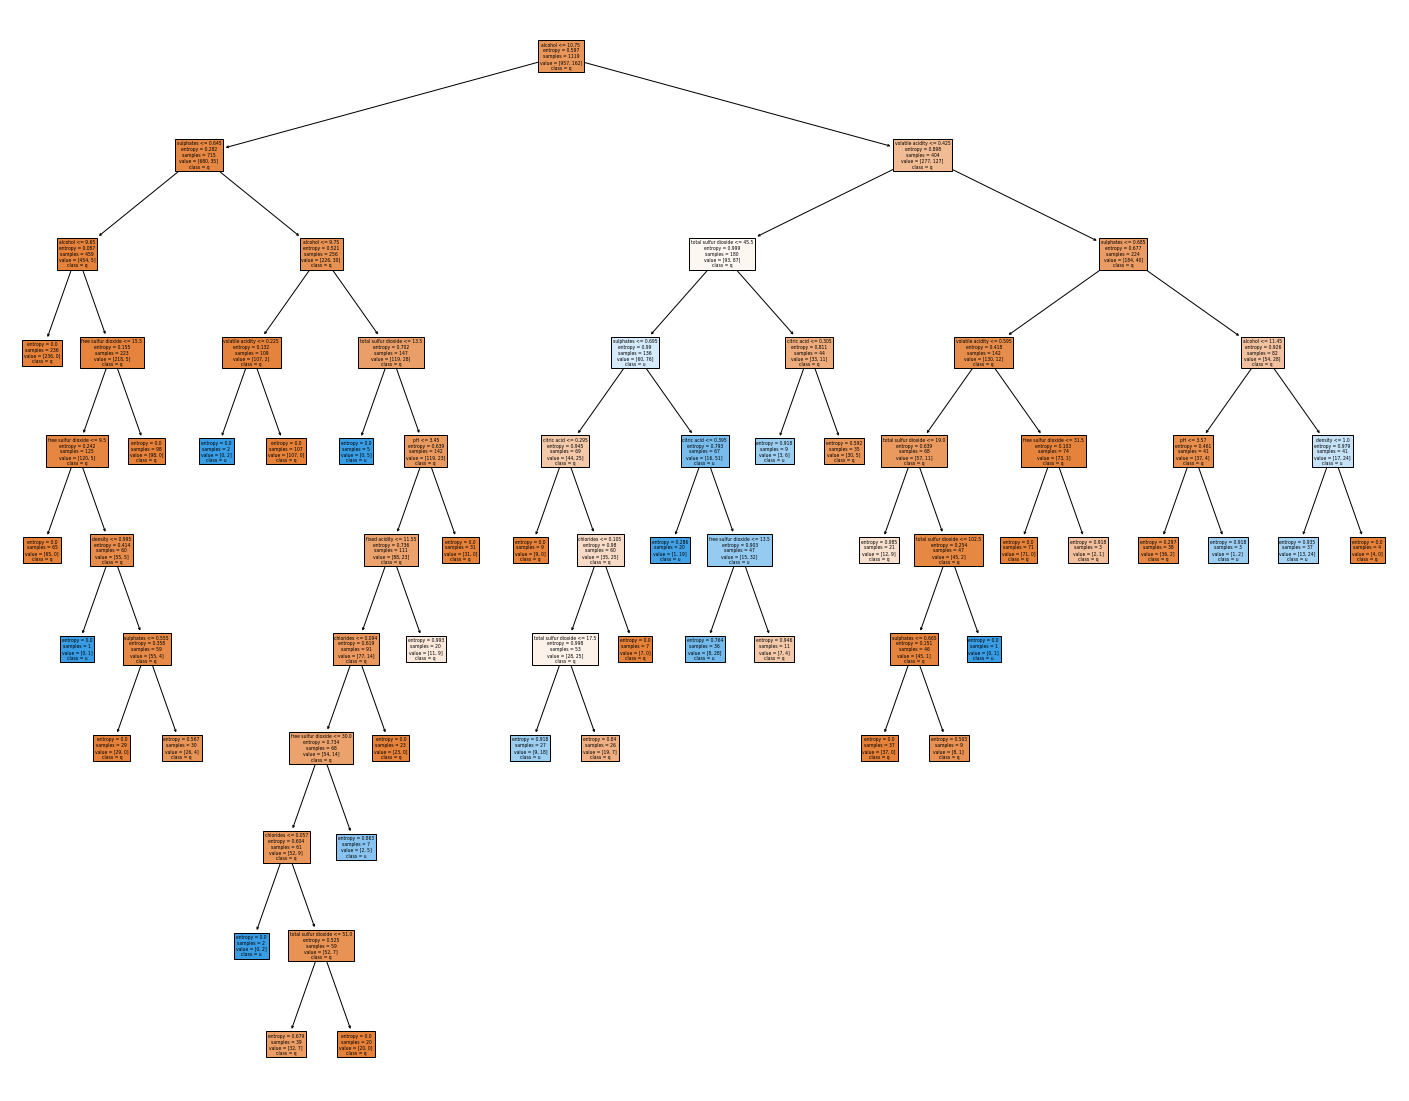

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature,  
                   class_names="quality",
                   filled=True)

In [32]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [33]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [34]:
wine1 = pd.read_csv("wine.csv")

In [35]:
q = wine1['quality']

q.replace(3, 0)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [36]:
q.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64